In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sea

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/Users/ankusmanish/Desktop/Training/Datasets/Week 6 data/bank.csv', sep = ';')

In [3]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
age          4521 non-null int64
job          4521 non-null object
marital      4521 non-null object
education    4521 non-null object
default      4521 non-null object
balance      4521 non-null int64
housing      4521 non-null object
loan         4521 non-null object
contact      4521 non-null object
day          4521 non-null int64
month        4521 non-null object
duration     4521 non-null int64
campaign     4521 non-null int64
pdays        4521 non-null int64
previous     4521 non-null int64
poutcome     4521 non-null object
y            4521 non-null object
dtypes: int64(7), object(10)
memory usage: 600.5+ KB


In [5]:
lis = []
cols = data.columns
for i in cols:
    if data[i].dtype == 'O':
        lis.append(i)

In [6]:
#The list of columns that has categorical values
print(lis)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']


In [7]:
for i in lis:
    print(i.upper())
    print(data[i].value_counts())
    print('-'*100)
    print('-'*100)

JOB
management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
MARITAL
married     2797
single      1196
divorced     528
Name: marital, dtype: int64
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
EDUCATION
secondary    2306
tertiary     1350
primary       678
unknown       187
Name: education, dtype: int64
----------------------------------------------------------------------------------------------------
----------------

In [8]:
outcome = data['y']

In [9]:
data.drop(['job','default','housing','loan','month','poutcome','contact','day','marital','education','y'], axis = 1, inplace = True)

In [10]:
data.head()

,age,balance,duration,campaign,pdays,previous
0,30,1787,79,1,-1,0
1,33,4789,220,1,339,4
2,35,1350,185,1,330,1
3,30,1476,199,4,-1,0
4,59,0,226,1,-1,0


In [11]:
outcome = pd.DataFrame(outcome, columns = ['y'])

In [12]:
outcome.head()

,y
0,no
1,no
2,no
3,no
4,no


In [13]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

In [14]:
dat = lb.fit_transform(outcome)

In [15]:
outcome = pd.DataFrame(dat, columns = ['y'])

In [16]:
outcome['y'].value_counts()

0    4000
1     521
Name: y, dtype: int64

In [17]:
mod_data = pd.concat([data, outcome], axis = 1)

In [18]:
mod_data.head()

,age,balance,duration,campaign,pdays,previous,y
0,30,1787,79,1,-1,0,0
1,33,4789,220,1,339,4,0
2,35,1350,185,1,330,1,0
3,30,1476,199,4,-1,0,0
4,59,0,226,1,-1,0,0


In [19]:
mod_data.columns

Index(['age', 'balance', 'duration', 'campaign', 'pdays', 'previous', 'y'], dtype='object')

In [20]:
data = pd.DataFrame(mod_data, columns = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous', 'y'])

In [21]:
data.head()

,age,balance,duration,campaign,pdays,previous,y
0,30,1787,79,1,-1,0,0
1,33,4789,220,1,339,4,0
2,35,1350,185,1,330,1,0
3,30,1476,199,4,-1,0,0
4,59,0,226,1,-1,0,0


In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
sc = StandardScaler()

In [24]:
scaled_data = data.copy()

In [25]:
col_names = ['age', 'balance', 'duration', 'pdays']
features = scaled_data[col_names]
sc = StandardScaler()
scaled_features = sc.fit_transform(features.values)

In [26]:
scaled_features.shape

(4521, 4)

In [27]:
scaled_data[col_names] = scaled_features
data = scaled_data
data.head()

,age,balance,duration,campaign,pdays,previous,y
0,-1.056270,0.121072,-0.711861,1,-0.407218,0,0
1,-0.772583,1.118644,-0.169194,1,2.989044,4,0
2,-0.583458,-0.024144,-0.303898,1,2.899143,1,0
3,-1.056270,0.017726,-0.250017,4,-0.407218,0,0
4,1.686036,-0.472753,-0.146102,1,-0.407218,0,0


In [28]:
X_train, y_train, X_test, y_test = (data.iloc[:4000,:6], data.iloc[:4000,6:7], data.iloc[4000:,:6], data.iloc[4000:,6:7])




In [29]:
X_train.shape

(4000, 6)

In [30]:
X_train = X_train.T.values
y_train = y_train.T.values
X_test = X_test.T.values
y_test = y_test.T.values

# Implementing one layer neural network

In [31]:
def sigmoid(Z):
    A = 1 / (1 + (np.exp(-Z)))
    
    return A

In [32]:
def initialize_with_zeros(dim):
    w = np.zeros((dim,1))
    b = 0
    
    return w,b

In [33]:
def propagate(w, b, X, Y):
    
    m = X.shape[1]
    
    # forward propogation
    A = sigmoid(np.dot(w.T, X) + b) 
    cost = (- 1 / m) * np.sum(Y * np.log(A) + (1 - Y) * (np.log(1 - A)))  
    
    
    # backward propogation
    dw = (1 / m) * np.dot(X, (A - Y).T)
    db = (1 / m) * np.sum(A - Y)    
    
    grads = {
        'dw' : dw,
        'db' : db
    }
    
    return grads, cost

In [34]:
def optimize(w, b, X, Y, num_iterations, learning_rate):
    
    costs = []
    
    for i in range(num_iterations):
        # Cost and gradient calculation 
        grads, cost = propagate(w, b, X, Y)
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update parameters
        w = w - learning_rate * dw  
        b = b - learning_rate * db
        
        costs.append(cost)
        
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs        

In [35]:
def model(X_train, Y_train, X_test, Y_test, num_iterations, learning_rate):
    
    w, b = initialize_with_zeros(X_train.shape[0])
    
    params, grads, costs  = optimize(w, b, X_train, Y_train, num_iterations, learning_rate)
    
    w = params["w"]
    b = params["b"]
        
    d = {"costs": costs,
         "w" : w, 
         "b" : b}
    
    return d     

In [36]:
d = model(X_train, y_train, X_test, y_test, num_iterations = 20000, learning_rate = 0.001)

In [37]:
num_iterations = range(20000)

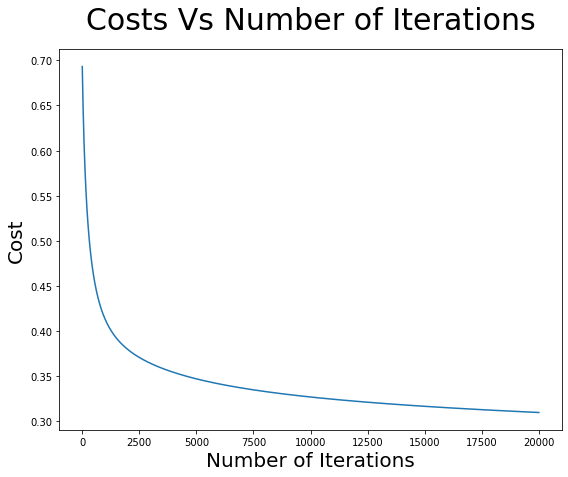

In [38]:
plt.figure(figsize = (9,7))
plt.plot(num_iterations, d['costs'])
plt.xlabel('Number of Iterations', fontsize = 20)
plt.ylabel('Cost', fontsize = 20)
plt.title('Costs Vs Number of Iterations', fontsize = 30, pad = 20)
plt.show()

In [39]:
w = d['w']
b = d['b']

In [40]:
def predict(w, b, test):
    val = sigmoid(np.dot(w.T, test) + b)
    pred = np.round(val)
    return pred

In [41]:
y_pred = predict(w,b,X_test)

In [42]:
y_pred = y_pred.astype('int')

In [43]:
def accuracy(y_test, y_pred):
    true = 0
    false = 0
    for i in range(len(y_test[0])):
        if y_test[0][i] == y_pred[0][i]:
            true += 1
        else:
            false += 1

    accuracy = true * 100 / (true + false)       
    return accuracy

In [44]:
accuracy(y_test, y_pred)

88.29174664107485